In [1]:
# Dataset : https://www.kaggle.com/datasets/ankurbajaj9/obesity-levels

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [3]:
!kaggle datasets download -d ankurbajaj9/obesity-levels

100% 115k/115k [00:00<00:00, 356kB/s]
100% 115k/115k [00:00<00:00, 355kB/s]


In [4]:
import zipfile
zip_ref = zipfile.ZipFile('/content/obesity-levels.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [5]:
#importing necessary library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from collections import Counter

from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import make_scorer, f1_score, accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score

from sklearn.cluster import KMeans


In [6]:
# reading the file 
df = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')

In [7]:
# checking top 5 row of dataset
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


### Attributes related with eating habits are:

Frequent consumption of high caloric food (FAVC),

Frequency of consumption of vegetables (FCVC),

Number of main meals (NCP),

Consumption of food between meals (CAEC),

Consumption of water daily (CH20),

and Consumption of alcohol (CALC).

### Attributes related with the physical condition are:

Calories consumption monitoring (SCC),

Physical activity frequency (FAF),

Time using technology devices (TUE),

Transportation used (MTRANS),

Other variables were:
Gender, Age, Height and Weight.

In [8]:
df.shape

(2111, 17)

In [9]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [10]:
df.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,2111.0,24.312600,6.345968,14.00,19.947192,22.777890,26.000000,61.00
Height,2111.0,1.701677,0.093305,1.45,1.630000,1.700499,1.768464,1.98
Weight,2111.0,86.586058,26.191172,39.00,65.473343,83.000000,107.430682,173.00
FCVC,2111.0,2.419043,0.533927,1.00,2.000000,2.385502,3.000000,3.00
NCP,2111.0,2.685628,0.778039,1.00,2.658738,3.000000,3.000000,4.00
CH2O,2111.0,2.008011,0.612953,1.00,1.584812,2.000000,2.477420,3.00
FAF,2111.0,1.010298,0.850592,0.00,0.124505,1.000000,1.666678,3.00
TUE,2111.0,0.657866,0.608927,0.00,0.000000,0.625350,1.000000,2.00


### Exploring Features

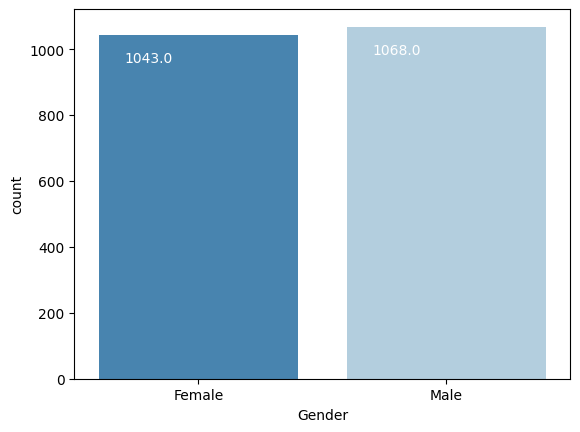

In [13]:
# the number of men and women in the dataset.
ax = sns.countplot(x = 'Gender', data = df, palette = "Blues_r")
for p in ax.patches:
        ax.annotate(f"\n{p.get_height()}", (p.get_x()+0.2, p.get_height()), 
                    ha = "center", va = "top", color = "white", size = 10)


There are almost an equal number of females and males in the dataset so data is balanced.

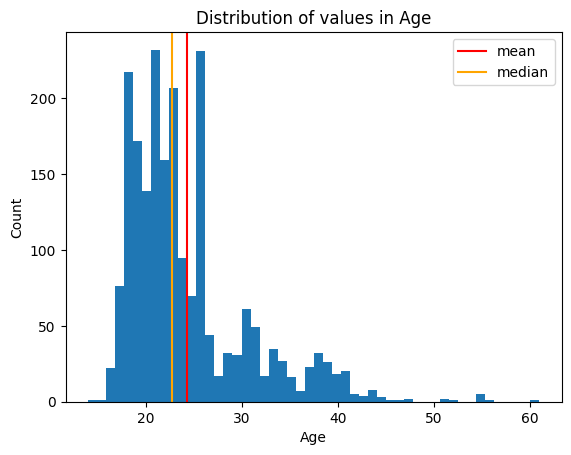

In [14]:
# Computing and visualizing distribution of Age

plt.hist(df['Age'], bins = "fd")
plt.axvline(df['Age'].mean(), color = "red", label = "mean")
plt.axvline(df['Age'].median(), color = "orange", label = "median")   
plt.xlabel(f"{'Age'}")
plt.ylabel("Count")
plt.legend()
plt.title(f"Distribution of values in {'Age'}")
plt.show()

In [15]:
df['Age'].describe()

count    2111.000000
mean       24.312600
std         6.345968
min        14.000000
25%        19.947192
50%        22.777890
75%        26.000000
max        61.000000
Name: Age, dtype: float64

The youngest person in the dataset is 14 years old, and the oldest one is 61 years of age. Values in this column are not normally distributed, the historgram is positively skewed with mean 24.31 and median 22.78 closer to the lower bound.

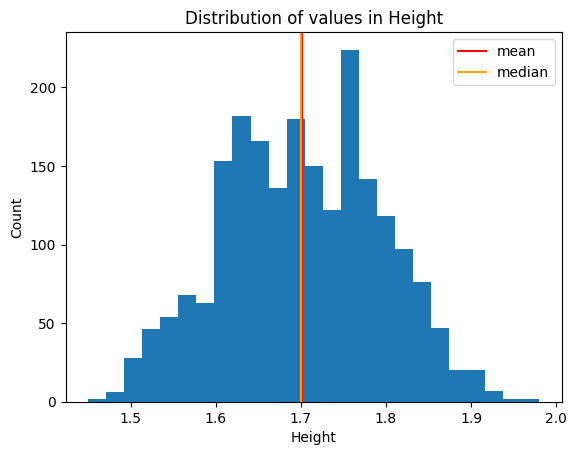

In [16]:
# Visualizing Height
plt.hist(df['Height'], bins = "fd")
plt.axvline(df['Height'].mean(), color = "red", label = "mean")
plt.axvline(df['Height'].median(), color = "orange", label = "median")   
plt.xlabel(f"{'Height'}")
plt.ylabel("Count")
plt.legend()
plt.title(f"Distribution of values in {'Height'}")
plt.show()


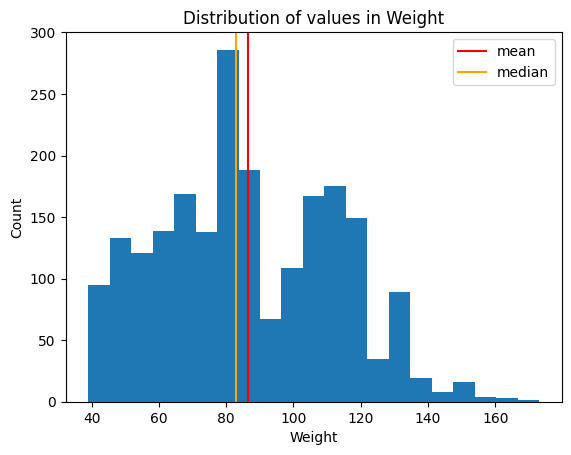

In [17]:
# Visualizing For Weight
plt.hist(df['Weight'], bins = "fd")
plt.axvline(df['Weight'].mean(), color = "red", label = "mean")
plt.axvline(df['Weight'].median(), color = "orange", label = "median")   
plt.xlabel(f"{'Weight'}")
plt.ylabel("Count")
plt.legend()
plt.title(f"Distribution of values in {'Weight'}")
plt.show()

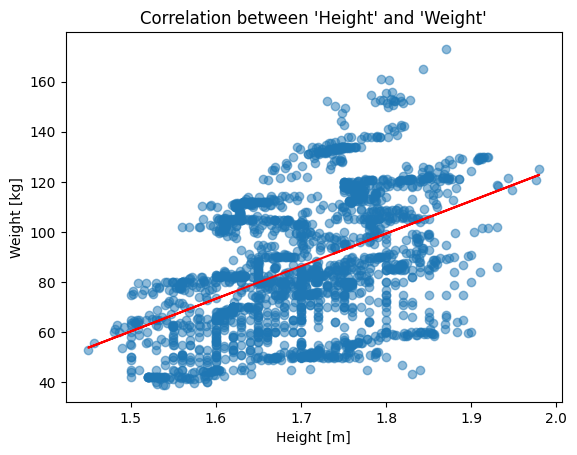

In [18]:
plt.scatter(df["Height"], df["Weight"], alpha = 0.5)
m, b = np.polyfit(df["Height"], df["Weight"], 1)
plt.plot(df["Height"], m * df["Height"] + b, color = "red")

plt.xlabel("Height [m]")
plt.ylabel("Weight [kg]")
plt.title("Correlation between 'Height' and 'Weight'")
plt.show()

------

People, according to their Body mass index (BMI), are categorised as:

* Underweight if BMI < 18.5
*Normal if BMI 18.5 - 24.9
*Obesity I if BMI 30.0 - 34.9
*Obesity II if BMI 35.0 to 39.9
*Obesity III if BMI > 40

Number of people per category is displayed below 

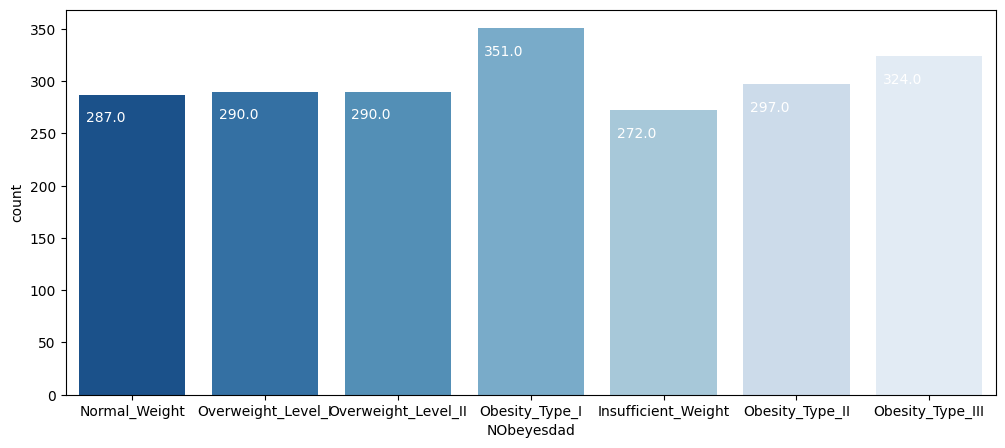

In [19]:
plt.figure(figsize = (12, 5))
ax = sns.countplot(x = 'NObeyesdad' , data = df, palette = "Blues_r")
for p in ax.patches:
        ax.annotate(f"\n{p.get_height()}", (p.get_x()+0.2, p.get_height()), 
                    ha = "center", va = "top", color = "white", size = 10)

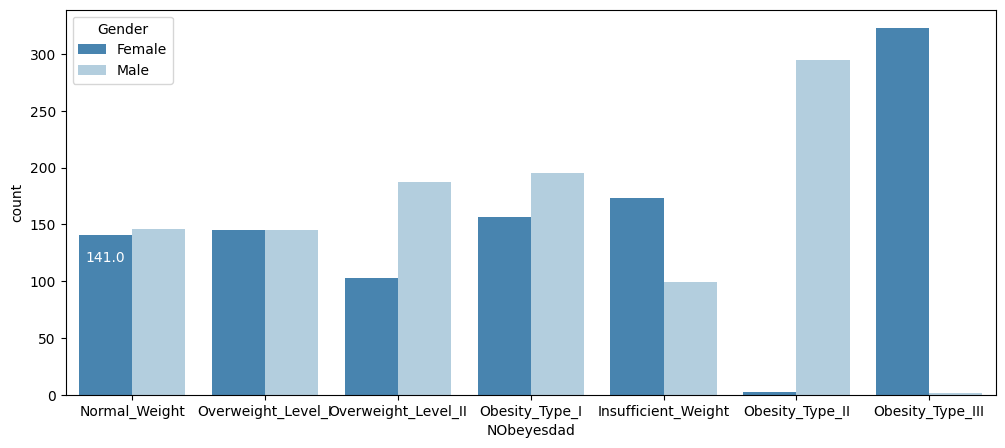

In [20]:
plt.figure(figsize = (12, 5))
ax = sns.countplot(x = 'NObeyesdad', data = df,hue = 'Gender', palette = "Blues_r")
for p in ax.patches:
        ax.annotate(f"\n{p.get_height()}", (p.get_x()+0.2, p.get_height()), 
                    ha = "center", va = "top", color = "white", size = 10)
        plt.show()

Women are more likely to have "Insufficient weight" than men. On the other hand, there are more obese men than women

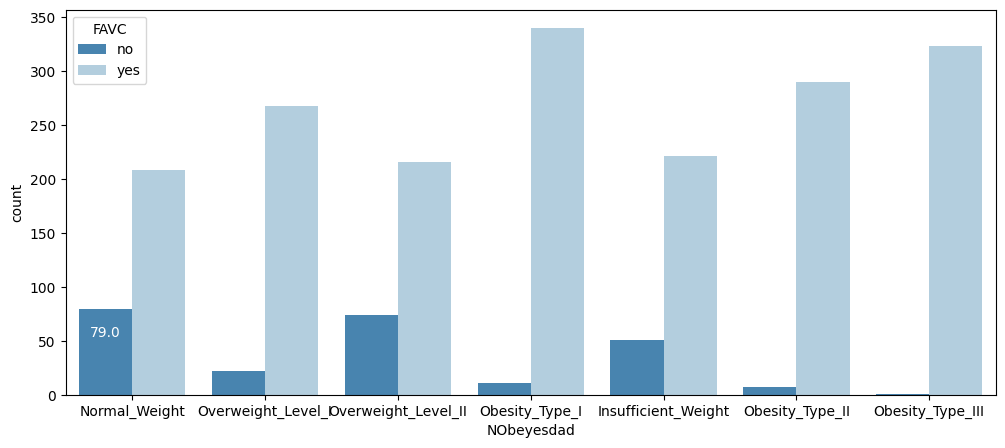

In [21]:
plt.figure(figsize = (12, 5))
ax = sns.countplot(x = 'NObeyesdad', data = df,hue = 'FAVC', palette = "Blues_r")
for p in ax.patches:
        ax.annotate(f"\n{p.get_height()}", (p.get_x()+0.2, p.get_height()), 
                    ha = "center", va = "top", color = "white", size = 10)
        plt.show()

People having snacks from time to time go into "Overweight" or "Obesity" categories.

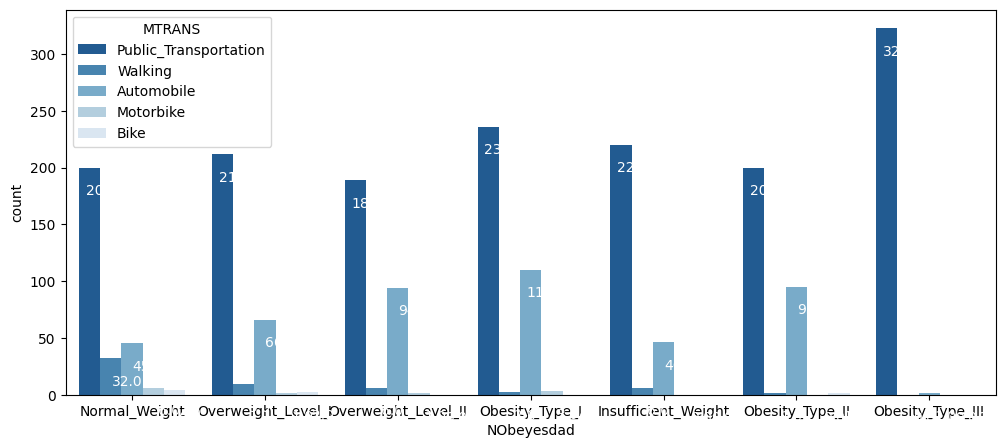

In [22]:
plt.figure(figsize = (12, 5))
ax = sns.countplot(x = 'NObeyesdad', data = df,hue = 'MTRANS', palette = "Blues_r")
for p in ax.patches:
        ax.annotate(f"\n{p.get_height()}", (p.get_x()+0.2, p.get_height()), 
                    ha = "center", va = "top", color = "white", size = 10)
plt.show()

Transportation seems does not (significantly) affect a person's weight

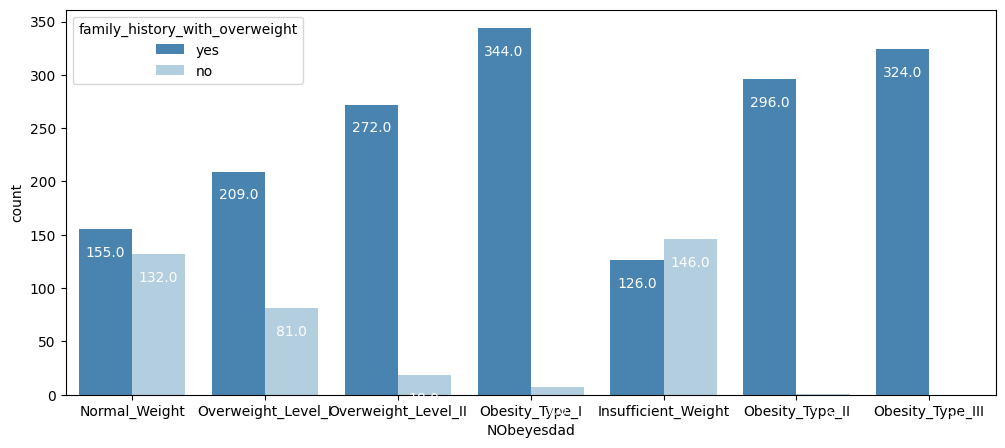

In [23]:
plt.figure(figsize = (12, 5))
ax = sns.countplot(x = 'NObeyesdad', data = df,hue = 'family_history_with_overweight', palette = "Blues_r")
for p in ax.patches:
        ax.annotate(f"\n{p.get_height()}", (p.get_x()+0.2, p.get_height()), 
                    ha = "center", va = "top", color = "white", size = 10)
plt.show()

 All those categorised as overweight or obese had family members suffering from weight problems

<ipython-input-24-fac0ed195cef>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),


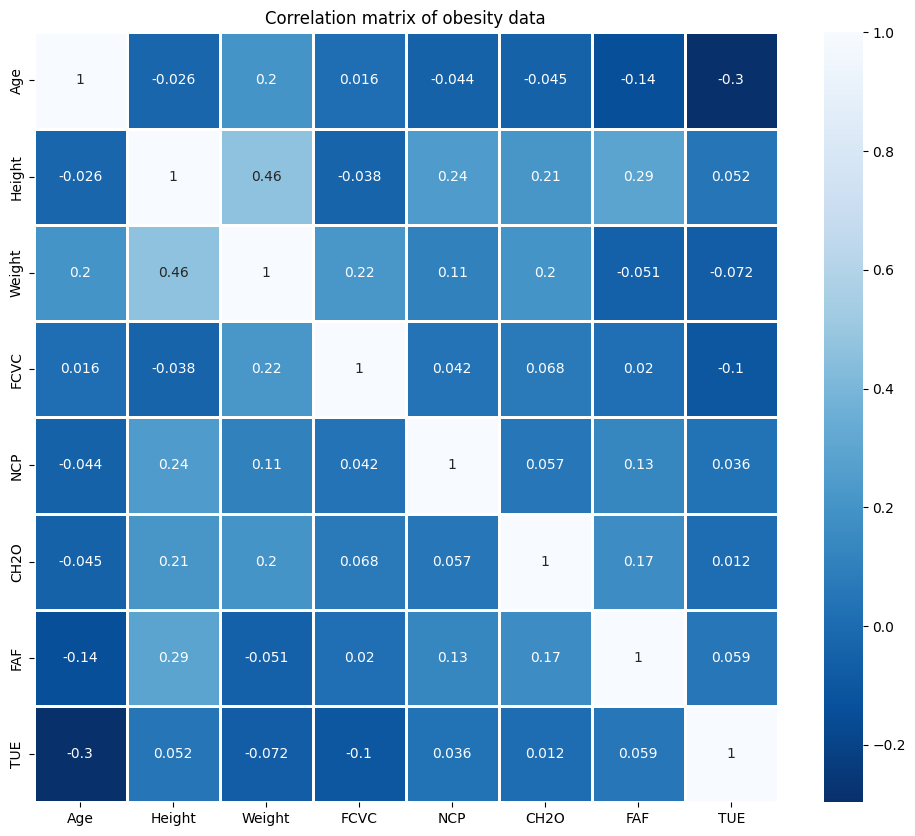

In [24]:
plt.figure(figsize = (12, 10))
sns.heatmap(df.corr(),
           annot = True,
           cmap = "Blues_r",
           linewidths = 2, 
           linecolor = "white")
plt.title("Correlation matrix of obesity data")
plt.show()

# Data pre-processing

### Encoding
Categorical variables are one-hot encoded with get_dummies(). Labels i.e., the column holding information if a person is overweight/obese or not are stored in separate variable

In [25]:
df_numeric = df[["Age", "Height", "Weight", "FCVC", "NCP", "CH2O", "FAF", "TUE"]]

In [26]:
df_dummies = pd.get_dummies(df[["Gender", "family_history_with_overweight", "FAVC", "CAEC", "SMOKE", "SCC", "CALC", "MTRANS"]])

In [27]:
df_label = df[["NObeyesdad"]]

In [28]:
df_concat = pd.concat([df_numeric, df_dummies, df_label], axis = 1)

In [29]:
df_concat.head()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender_Female,Gender_Male,...,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,NObeyesdad
0,21.0,1.62,64.0,2.0,3.0,2.0,0.0,1.0,1,0,...,0,0,0,1,0,0,0,1,0,Normal_Weight
1,21.0,1.52,56.0,3.0,3.0,3.0,3.0,0.0,1,0,...,0,0,1,0,0,0,0,1,0,Normal_Weight
2,23.0,1.80,77.0,2.0,3.0,2.0,2.0,1.0,0,1,...,0,1,0,0,0,0,0,1,0,Normal_Weight
3,27.0,1.80,87.0,3.0,3.0,2.0,2.0,0.0,0,1,...,0,1,0,0,0,0,0,0,1,Overweight_Level_I
4,22.0,1.78,89.8,2.0,1.0,2.0,0.0,0.0,0,1,...,0,0,1,0,0,0,0,1,0,Overweight_Level_II


In [30]:
# Features and labels are separated and stored in different variables.

df_label = df_concat["NObeyesdad"]
df_features = df_concat.drop("NObeyesdad", axis = 1)

In [31]:
df_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 31 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 2111 non-null   float64
 1   Height                              2111 non-null   float64
 2   Weight                              2111 non-null   float64
 3   FCVC                                2111 non-null   float64
 4   NCP                                 2111 non-null   float64
 5   CH2O                                2111 non-null   float64
 6   FAF                                 2111 non-null   float64
 7   TUE                                 2111 non-null   float64
 8   Gender_Female                       2111 non-null   uint8  
 9   Gender_Male                         2111 non-null   uint8  
 10  family_history_with_overweight_no   2111 non-null   uint8  
 11  family_history_with_overweight_yes  2111 no

In [32]:
df_features = df_features.astype("float")

In [33]:
# features data are scaled with MinMaxScaler() which makes all values between 0 and 1.


df_features_scaled = MinMaxScaler().fit_transform(df_features)

In [34]:
df_features_scaled.min(axis=1), df_features_scaled.max(axis=1)

(array([0., 0., 0., ..., 0., 0., 0.]), array([1., 1., 1., ..., 1., 1., 1.]))

In [35]:
# Encode Labels

encoder = LabelEncoder()
encoder.fit(df_label)

LabelEncoder()

In [36]:
list(encoder.classes_)

['Insufficient_Weight',
 'Normal_Weight',
 'Obesity_Type_I',
 'Obesity_Type_II',
 'Obesity_Type_III',
 'Overweight_Level_I',
 'Overweight_Level_II']

In [37]:
df_labels_encoded = encoder.transform(df_label)


In [38]:
df_labels_encoded

array([1, 1, 1, ..., 4, 4, 4])

In [39]:
# The dataset is getting split into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(
                df_features, df_labels_encoded, 
                test_size = 0.2, stratify = df_labels_encoded,
                random_state = 42)

In [40]:
X_train.shape,X_test.shape, y_train.shape, y_test.shape

((1688, 31), (423, 31), (1688,), (423,))

### Model training

The first modelling task is to classify data into obesity categories. "Accuracy" is a good performance metric but "f1 score" (geometric mean of "precision" and "recall") is a more appropriate one. To use it for grid search and cross validation, it is instantiated as a variable.

It could be assumed that many classifiers would return good scores. DecisionTreeClassifier() is chosen for its simplicity and interpretability. It has several hyper-parameters, which could be tuned but only tree's depth was used.

RandomSearchCV() checks which combination returns best results. The grid space is limited between 5 and 15 tree nodes (questions). These are stored in a dictionary, which is passed to for searching. Models are trained and cross-validated on 5 folds



In [41]:
f1 = make_scorer(f1_score, average = "weighted")

In [42]:
params = {"max_depth": [5, 7, 9, 11, 13, 15]}

In [43]:
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid = params, cv = 5, scoring = f1)

In [44]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [5, 7, 9, 11, 13, 15]},
             scoring=make_scorer(f1_score, average=weighted))

In [45]:
grid_search.cv_results_

{'mean_fit_time': array([0.00732765, 0.00702295, 0.00743384, 0.00825129, 0.0079639 ,
        0.01002903]),
 'std_fit_time': array([0.00213095, 0.00014281, 0.00021022, 0.0003089 , 0.00025089,
        0.00131041]),
 'mean_score_time': array([0.00240626, 0.00224504, 0.00232091, 0.00228057, 0.0025641 ,
        0.00260983]),
 'std_score_time': array([6.06759959e-04, 7.56965434e-05, 9.40013558e-05, 1.07293722e-04,
        8.48376896e-04, 4.27924532e-04]),
 'param_max_depth': masked_array(data=[5, 7, 9, 11, 13, 15],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'max_depth': 5},
  {'max_depth': 7},
  {'max_depth': 9},
  {'max_depth': 11},
  {'max_depth': 13},
  {'max_depth': 15}],
 'split0_test_score': array([0.77086901, 0.87562532, 0.91363788, 0.90519881, 0.90472376,
        0.90193277]),
 'split1_test_score': array([0.81812078, 0.9121426 , 0.94112337, 0.93223314, 0.92352762,
        0.94088679]),
 'split2_test_

In [46]:
grid_search.best_params_

{'max_depth': 15}

The best model is a tree with 13 nodes. Therefore, this value is set as a hyper-parameter.

In [47]:
# Train and Evaluate Model

model_tree = DecisionTreeClassifier(max_depth = 13, random_state = 42)

In [48]:
model_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=13, random_state=42)

In [49]:
print(f"Accuracy on Train data: {accuracy_score(y_train,model_tree.predict(X_train))}")
print(f"F1 score on Train data: {f1_score(y_train, model_tree.predict(X_train), average = 'weighted')}")
print(f"Accuracy on Test data: {accuracy_score(y_test, model_tree.predict(X_test))}")
print(f"F1 on Test data: {f1_score(y_test, model_tree.predict(X_test), average = 'weighted')}")

Accuracy on Train data: 1.0
F1 score on Train data: 1.0
Accuracy on Test data: 0.9148936170212766
F1 on Test data: 0.9152724912457364


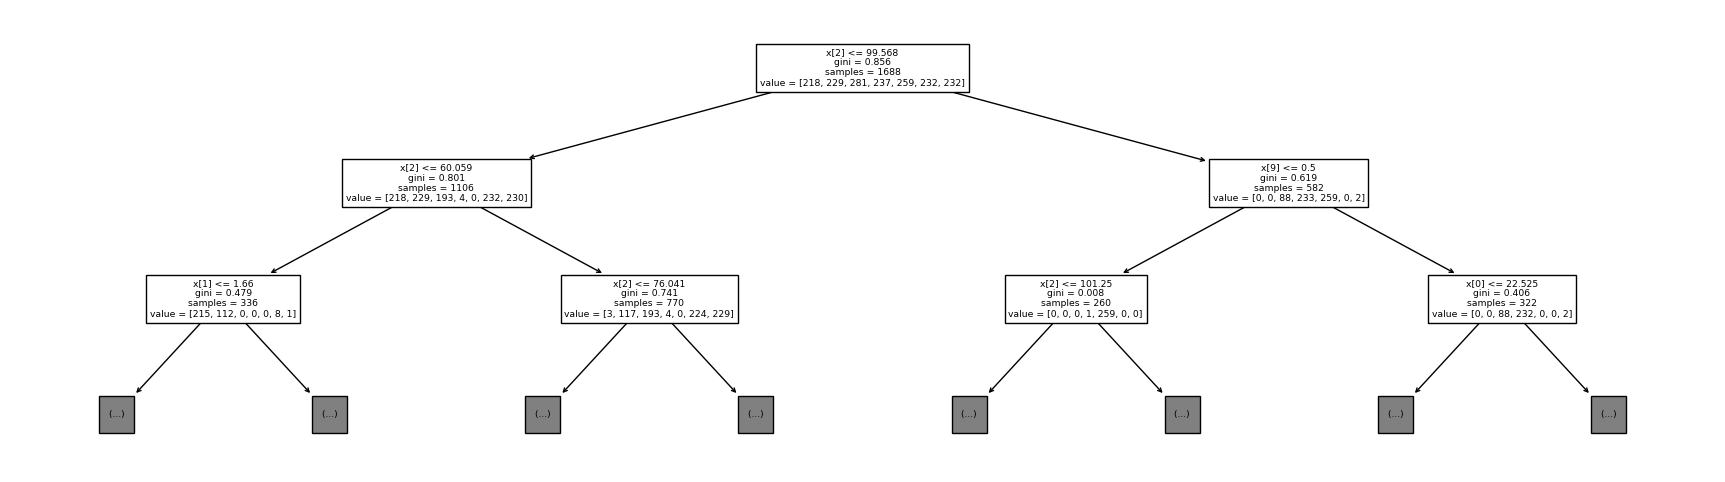

In [50]:
plt.figure(figsize = (22, 6))
plot_tree(model_tree, max_depth = 2)
plt.show()

In [51]:
# ROC Score and Curve

df_score_probability = model_tree.predict_proba(X_test)
df_score_probability

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]])

In [52]:
roc_auc_score(y_test, df_score_probability, multi_class = "ovr")

0.948826099443833

Aggregated AUC score for all classes is around 95%. This is not so bad performance.

In [53]:
# Clustering


kmeans = KMeans(n_clusters = 7, init = "k-means++")

In [54]:
model_tree.feature_importances_

array([0.04184926, 0.22082785, 0.47515547, 0.0135702 , 0.00714488,
       0.00561014, 0.00081335, 0.01124707, 0.00060059, 0.15732823,
       0.0006524 , 0.00232294, 0.02176254, 0.00069194, 0.00134318,
       0.00157633, 0.00760256, 0.        , 0.        , 0.00135428,
       0.        , 0.        , 0.        , 0.        , 0.00062654,
       0.02540261, 0.00251765, 0.        , 0.        , 0.        ,
       0.        ])

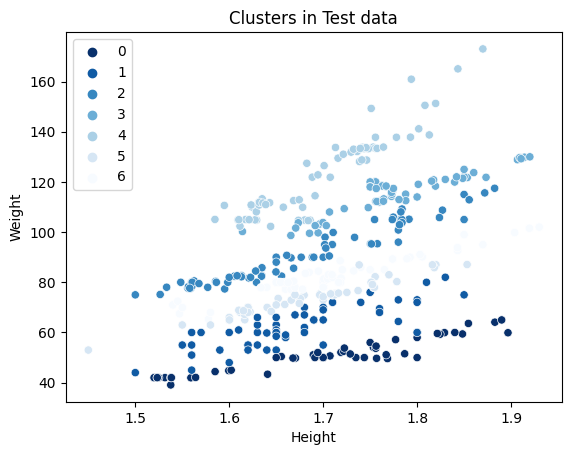

In [55]:
sns.scatterplot(data = X_test, x = "Height", y = "Weight", hue = y_test, palette = "Blues_r")
plt.title("Clusters in Test data")
plt.show()

In [56]:
predicted_labels = kmeans.fit_predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [57]:
predicted_labels

array([5, 1, 6, 2, 0, 6, 4, 1, 3, 5, 5, 1, 4, 1, 5, 1, 3, 6, 3, 5, 5, 4,
       0, 6, 6, 1, 3, 4, 3, 0, 4, 0, 1, 6, 2, 1, 4, 5, 2, 5, 6, 5, 2, 0,
       6, 0, 5, 6, 4, 6, 0, 5, 1, 4, 6, 5, 4, 2, 2, 0, 6, 0, 1, 1, 6, 3,
       6, 5, 2, 0, 2, 1, 5, 5, 3, 5, 5, 5, 6, 6, 1, 6, 4, 0, 1, 3, 4, 1,
       3, 3, 4, 3, 6, 4, 1, 1, 5, 1, 2, 4, 3, 4, 4, 1, 1, 2, 4, 3, 3, 4,
       3, 1, 2, 4, 4, 2, 5, 2, 1, 1, 0, 1, 2, 5, 6, 0, 3, 0, 3, 4, 2, 6,
       1, 5, 5, 1, 4, 3, 4, 5, 2, 0, 4, 6, 3, 4, 0, 0, 1, 3, 3, 6, 2, 5,
       4, 4, 4, 3, 1, 6, 6, 4, 0, 0, 4, 6, 3, 6, 6, 4, 6, 5, 6, 2, 4, 1,
       6, 1, 1, 6, 0, 4, 0, 4, 5, 5, 5, 2, 6, 1, 5, 1, 2, 3, 5, 4, 6, 1,
       0, 0, 0, 0, 6, 0, 3, 5, 3, 6, 1, 4, 5, 2, 1, 3, 0, 6, 6, 6, 0, 3,
       1, 0, 6, 6, 1, 6, 4, 4, 0, 6, 0, 5, 0, 2, 0, 6, 1, 1, 0, 6, 4, 5,
       0, 4, 1, 3, 1, 5, 3, 2, 1, 1, 4, 6, 4, 2, 3, 0, 6, 4, 4, 3, 1, 6,
       2, 0, 6, 0, 1, 6, 4, 5, 4, 6, 1, 2, 4, 5, 6, 2, 6, 0, 6, 5, 1, 3,
       0, 3, 3, 2, 1, 1, 5, 5, 3, 5, 6, 3, 6, 1, 0,

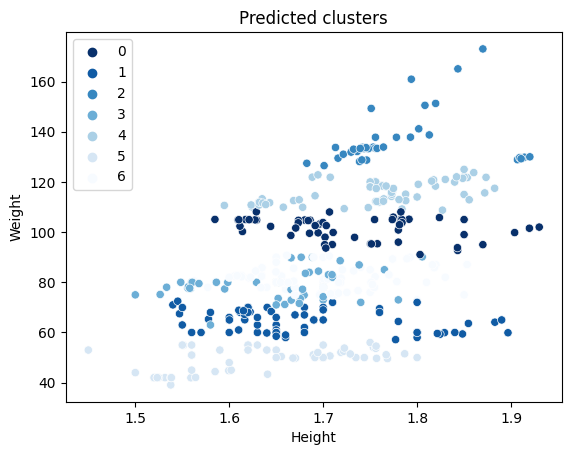

In [58]:
sns.scatterplot(data = X_test, x = "Height", y = "Weight", hue = predicted_labels, palette = "Blues_r")
plt.title("Predicted clusters")
plt.show()

A person's height and weight are the most important factors determining his/her obesity status. Other factors might also play a role, e.g., eating habits and physical activity